# **Churn Analysis: Telco Customers**

#### By: Joey Christian S

---

### **Business Problem**



**Context**

Sebuah perusahaan yang bergerak di bidang telekomunikasi ingin mendapatkan customer yang mau menggunakan layanan mereka dalam jangka waktu yang lama. Namun, terdapat banyak orang yang mau menggunakan layanan mereka. Dari sekian banyak orang yang mau menggunakan layanan perusahaan, pihak perusahaan ingin mengetahui apakah customer tersebut hanya akan menggunakan layanan perusahaan untuk jangka waktu yang pendek atau mereka akan menggunakan layanan perusahaan untuk jangka waktu yang panjang.

**Target:**

0 : tidak churn

1 : churn

**Problem Statement:**

Perusahaan ingin meningkatkan revenue dengan melakukan efisiensi di sisi finansial perusahaan, terutama pada bagian cost yang dikeluarkan untuk customer. Sehingga perusahaan meminta tim Customer Relationship Management (CRM). Sebagai data scientist dari perusahaan tersebut, divisi CRM meminta agar data-data customer churn dianalisa. Mereka ingin mencari tahu customer mana sajakah yang akan churn atau berhenti menggunakan jasa telekomunikasi perusahaan, serta faktor-faktor apa sajakah yang menjadi penentu dari customer tersebut churn. Selama ini, perusahaan menganggap bahwa semua customer akan melakukan churn, sehingga banyak terjadi pengeluaran yang sia-sia.

Diketahui bahwa biaya yang dikeluarkan untuk perusahaan mencari ataupun mempertahankan seorang customer dikenal dengan nama Acquisition Cost dan Retention Cost. Biaya dari Acquisition cost untuk satu customer baru sama dengan 5x dari biaya yang dikeluarkan untuk retention cost. Sehingga, apabila prediksi customer yang tidak akan churn salah, maka cost yang dikeluarkan akan lebih besar.

**Metric Evaluation**

Metric yang akan digunakan untuk menganalisa biaya yang harus dikeluarkan oleh perusahaan adalah dengan menggunakan confussion matrix.

**False Positive:** dipredict churn, padahal tidak churn

- Konsekuensi:

Ketika customer diprediksi churn, perusahaan harus mengeluarkan biaya untuk mempertahankan customer, seperti discount, fasilitas tertentu, dan treatment khusus lainnya. Namun customer tersebut loyal (tetap menggunakan jasa perusahaan) sehingga biaya yang dikeluarkan perusahaan akan sia-sia.

**False Negative:** dipredict tidak churn, padahal churn

- Konsekuensi:

Ketika customer diprediksi tidak churn, perusahaan tidak memberikan treatment apapun untuk customer. Namun customer tersebut tiba-tiba churn, sehingga perusahaan harus melakukan pencarian terhadap customer-customer baru untuk menggantikan customer yang churn tersebut. Biaya yang dikeluarkan akan 5x lebih besar dibanding dengan biaya mempertahankan customer

Sehingga dapat dikatakan bahwa opsi terbaik adalah untuk mengurangi jumlah dari **False Negative.** Dimana metric yang akan digunakan adalah **f2 score**.

Contohnya apabila sebuah perusahan harus mengeluarkan biaya sebesar 200 dollar/orang untuk retention cost, maka acquisition cost adalah sebesar 1000 dollar/orang.

### **Data Understanding**



| #   | Column                            | Dtype   | Description                                                   |
|-----|-----------------------------------|---------|---------------------------------------------------------------|
| 0   | Dependents                        | object  | Whether the customer has dependents or not.                   |
| 1   | Tenure                            | int64   | Number of months the customer has stayed with the company.    |
| 2   | OnlineSecurity                    | object  | Whether the customer has online security or not.              |
| 3   | OnlineBackup                      | object  | Whether the customer has online backup or not.                |
| 4   | InternetService                   | object  | Whether the client is subscribed to Internet service.         |
| 5   | Device Protection                 | object  | Whether the client has device protection or not.              |
| 6   | TechSupport                       | object  | Whether the client has tech support or not.                   |
| 7   | Contract                          | object  | Type of contract according to duration.                       |
| 8   | PaperlessBilling                  | object  | Bills issued in paperless form.                               |
| 9   | MonthlyCharges                    | float64 | Amount of charge for service on monthly bases.                |
| 10  | Churn                             | object  | Whether the customer churns or not.                           |

#### **Libraries**

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, fbeta_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier              # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier         # Boosting

from xgboost.sklearn import XGBClassifier

# imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc

#### 
---

## **1. Load Dataset**

In [36]:
df = pd.read_csv(r'/Users/joeychristian/Desktop/Kelas DS/Testing DS/Modul 3/Telco Customer Churn/data_telco_customer_churn.csv')
df.head()

pd.set_option('display.max_columns', None)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [38]:
df.describe(include= 'all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [39]:
df.duplicated().sum()

77

In [40]:
df = df.drop_duplicates()
df.shape

(4853, 11)

In [41]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

## **2. EDA**

#### **2.1 Outliers**

In [42]:
num_cols = df.describe().columns
num_cols

Index(['tenure', 'MonthlyCharges'], dtype='object')

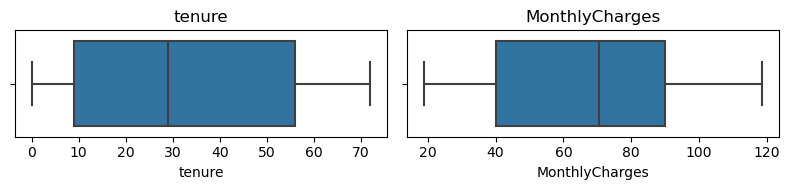

In [43]:
plt.figure(figsize=(8,2))
count = 1

for numerical in num_cols:

    plt.subplot(1,2, count)
    sns.boxplot(data=df, x= numerical)

    plt.title(numerical)
    plt.tight_layout()
    count = count + 1

Tidak ada outliers dari data, sehingga bisa langsung di EDA

#### **2.2 EDA After Outliers**

In [44]:
df.corr(method= 'spearman')

,tenure,MonthlyCharges
tenure,1.00000,0.25922
MonthlyCharges,0.25922,1.00000


Method yang digunakan spearman karena distribusi datanya tidak normal. Tidak ada feature yang tidak mempunyai korelasi yang kuat, baik negative ataupun positif.

In [45]:
cat_features = df.describe(include= 'object').columns
cat_features

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'Churn'],
      dtype='object')

In [46]:
num_features = df.describe().columns
num_features

Index(['tenure', 'MonthlyCharges'], dtype='object')

''

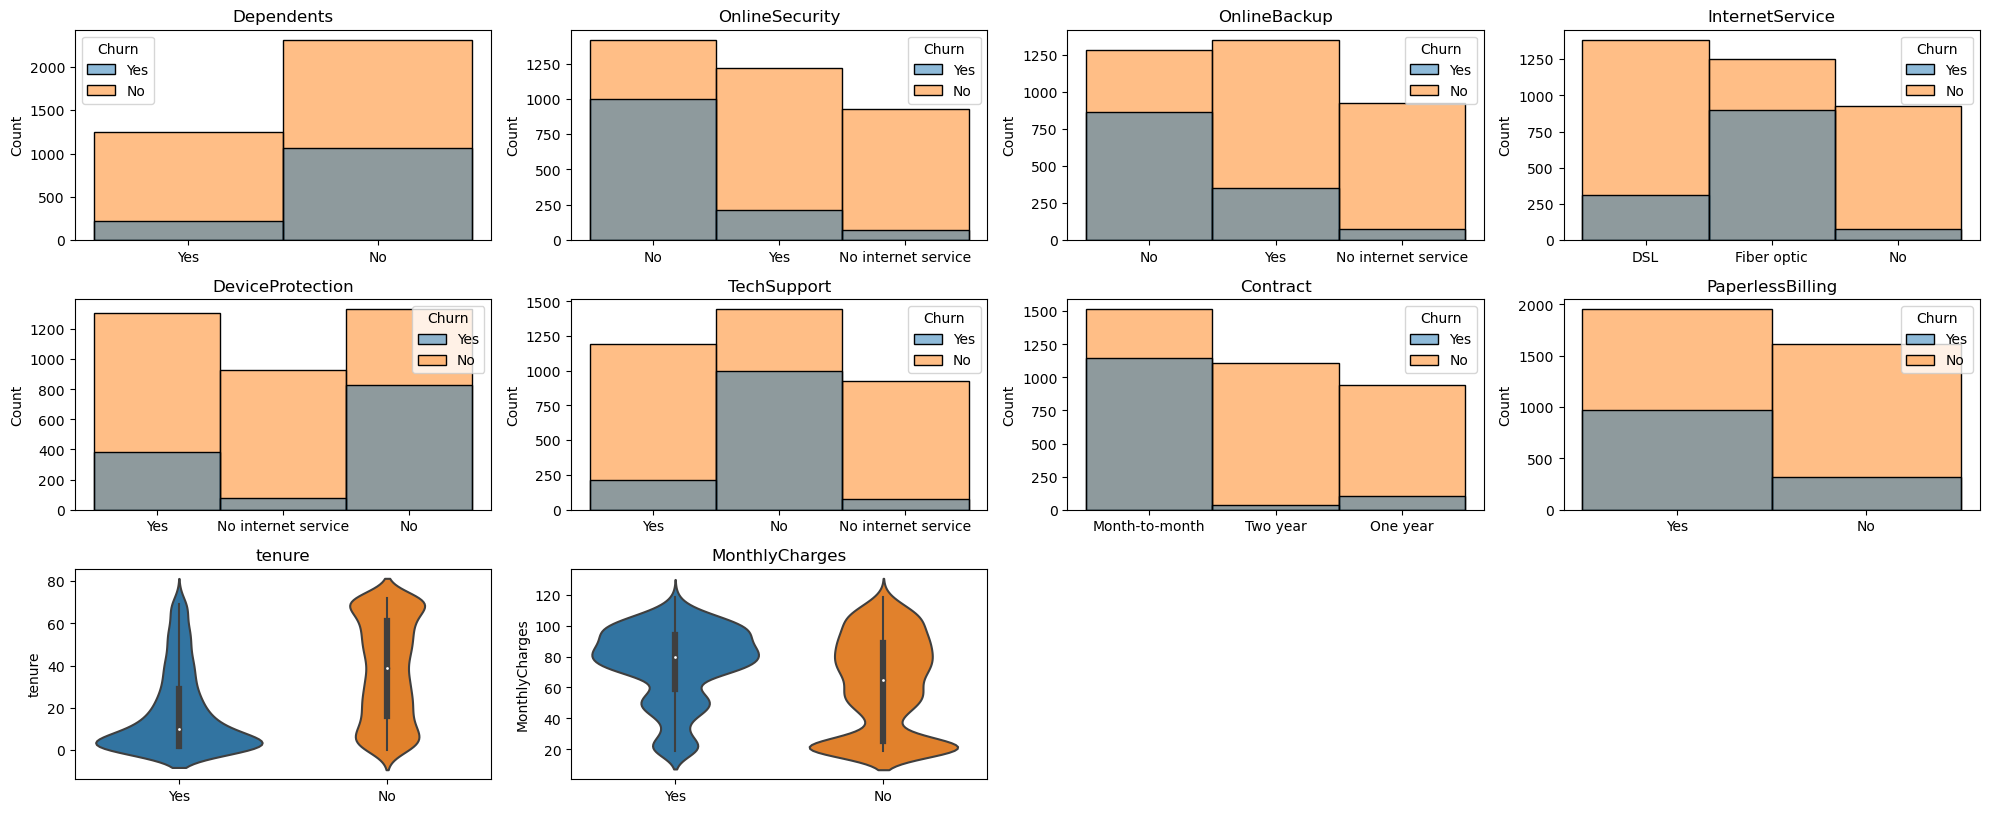

In [47]:
plt.figure(figsize=(20,8))
count = 1

for categorical in cat_features[:-1]:

    plt.subplot(3,4, count)
    sns.histplot(data=df, x= categorical, hue= 'Churn')
    plt.xlabel(None)

    plt.title(categorical)
    plt.tight_layout()
    count = count + 1

for numerical in num_features:

    plt.subplot(3,4, count)
    sns.violinplot(data= df, x= 'Churn', y= numerical)
    plt.xlabel(None)

    plt.title(numerical)
    plt.tight_layout
    count = count + 1

;

In [48]:
df['Churn'].value_counts() / len(df)

No     0.734597
Yes    0.265403
Name: Churn, dtype: float64

Proporsi dari customer yang akan churn adalah sebanyak 27% dari keseluruhan data. Sedangkan proporsi untuk customer yang tidak churn adalah sebesar 73%.

1. Dependents : customer yang **TIDAK MEMPUNYAI** dependents cenderung untuk churn lebih tinggi.
2. OnlineSecurity : customer yang **TIDAK MEMPUNYAI** online security cenderung untuk churn lebih tinggi.
3. OnlineBackup : customer yang **TIDAK MEMPUNYAI** online backup cenderung untuk churn lebih tinggi.
4. InternetService : customer yang **MEMPUNYAI** fiber optic sebagai internet service cenderung untuk churn lebih tinggi.
5. DeviceProtection : customer yang **TIDAK MEMPUNYAI** device protection cenderung untuk churn lebih tinggi.
6. TechSupport : customer yang **TIDAK MEMPUNYAI** tech support cenderung untuk churn lebih tinggi.
7. Contract : customer yang **MEMPUNYAI** month-to-month sebagai contract cenderung untuk churn lebih tinggi.
8. PaperlessBilling : customer yang **MEMPUNYAI** paperless biblling cenderung untuk churn lebih tinggi.
9. tenure : customer yang **MASIH BARU** cenderung untuk churn lebih tinggi.
10. MonthlyCharrges : customer yang bayar **LEBIH MAHAL** cenderung untuk churn lebih tinggi.

#### **2.3 Changing Churn Values to 0 and 1**

1 = Yes (Churn)

0 = No (Not Churn)

In [49]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


Algoritma machine learning tidak dapat membaca kolom-kolom categorical, sehingga harus dilakukan proses perubahan terlebih dahulu agar dapat terbaca oleh algoritma machine learning. Kolom yang akan diuba hanyalah kolom 'Churn' saja, sisanya akan diubah di step-step berikutnya.

## **3. Define X and y**

In [50]:
X = df.drop(columns= 'Churn')
y = df['Churn']

X adalah kolom-kolom yang akan berisi feature, sedangkan y adalah target dari analisa apakah seorang churn atau tidak.

## **4. Data Spliting**

In [51]:
(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    stratify= y,
    random_state= 0,
    test_size= 0.2
)

Data sudah di split menjadi 80% untuk train dan 20% untuk test.

Pada proses spliting kali ini, diperlukan parameter stratify untuk menjaga proporsi dari data. Sehingga proporsi dari kelas 1 dan 0 tetap sama untuk train set maupun test set. Splitting juga digunakan untuk melihat accurracy dari model secara keseluruhan.

## **5. Preprocessing**

In [52]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak ada yang perlu di impute, hanya di encode dan scaling saja.

Encode :
- Onehot : Dependents, Paperless Billings, Internet Service, Contract
- Ordinal : Online Security, Online Backup, Device Protection, Tech Support

Untuk sementara, kolom-kolom di ordinal dilakukan encoding secara ordinal oleh karena ada opsi untuk menentukan pilihan mau menggunakan fasilitas tersebut atau tidak. Sehingga ada kemungkinan untuk customer yang menggunakan fasilitas tersebut mempunyai prioritas yang lebih tinggi. Untuk mengetahui manakah opsi yang terbaik, maka akan dilakukan tuning di step-step berikutnya.

Kolom-kolom di onehot dilakukan encoding secara onehot oleh karena tidak mempunyai tingkatan nilai yang lebih tinggi antara satu dengan yang lainnya, dimana semua nilai unique yang berada di kolom tersebut mempunyai tingkat yang sama.

Scaling : 
- Robust : semua kolom numerical dan semua kolom categorical yang tidak di onehot

Scaling dengan metode robust dilakukan karena paling tahan terhadap outliers, dimana akan menggunakan median dan IQR. Sehingga efek outlier terhadap prediksi dapat dihilangkan.

#### **5.1 Mapping & Pipeline**

In [53]:
ordinal_map1 = [
    {'col' : 'OnlineSecurity', 'mapping' : {'No internet service' : 0, 'No' : 1, 'Yes' : 2}},
    {'col' : 'OnlineBackup', 'mapping' : {'No internet service' : 0, 'No' : 1, 'Yes' : 2}},
    {'col' : 'DeviceProtection', 'mapping' : {'No internet service' : 0, 'No' : 1, 'Yes' : 2}},
    {'col' : 'TechSupport', 'mapping' : {'No internet service' : 0, 'No' : 1, 'Yes' : 2}}
]

ordinal_map2 = [
    {'col' : 'OnlineSecurity', 'mapping' : {'No internet service' : 2, 'No' : 1, 'Yes' : 0}},
    {'col' : 'OnlineBackup', 'mapping' : {'No internet service' : 2, 'No' : 1, 'Yes' : 0}},
    {'col' : 'DeviceProtection', 'mapping' : {'No internet service' : 2, 'No' : 1, 'Yes' : 0}},
    {'col' : 'TechSupport', 'mapping' : {'No internet service' : 2, 'No' : 1, 'Yes' : 0}}
]

ordinal_map3 = [
    {'col' : 'OnlineSecurity', 'mapping' : {'No internet service' : 0, 'No' : 2, 'Yes' : 1}},
    {'col' : 'OnlineBackup', 'mapping' : {'No internet service' : 0, 'No' : 2, 'Yes' : 1}},
    {'col' : 'DeviceProtection', 'mapping' : {'No internet service' : 0, 'No' : 2, 'Yes' : 1}},
    {'col' : 'TechSupport', 'mapping' : {'No internet service' : 0, 'No' : 2, 'Yes' : 1}}
]

Mapping untuk kolom Online Security, Online Backup, Device Protection, dan Tech Support

In [54]:
contract_mapping = [
    {'col' : 'Contract', 'mapping' : {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}}
]

Mapping untuk kolom contract yang mau di tuning di step berikutnya.

In [55]:
# untuk kolom online Security, online backup, device protection, internet service
pipe_ordinal_robust = Pipeline([
    ('encoding', OrdinalEncoder(mapping= ordinal_map1)),
    ('scaling', RobustScaler())
])

In [56]:
pipe_contract1 = Pipeline([
    ('encoding', OneHotEncoder()),
])

pipe_contract2 = Pipeline([
    ('encoding_contract', OrdinalEncoder(mapping= contract_mapping)),
    ('scaling_pipe2', RobustScaler())
])

Kolom contract akan mempunyai 2 pipeline untuk di tuning karena apabila menggunakan onehot encoding, maka tidak diperlukan scaling. Sedangkan apabila menggunakan ordinal encoder diperlukan scaling untuk menyamakan skala.

#### **5.2 Transformer**

In [57]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Dependents', 'PaperlessBilling', 'InternetService']),
    ('contract', pipe_contract1, ['Contract']),
    ('ord_robust', pipe_ordinal_robust, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']),
    ('robust', RobustScaler(), ['tenure', 'MonthlyCharges'])
], remainder= 'passthrough')

In [58]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Dependents', 'PaperlessBilling',
                                  'InternetService']),
                                ('contract',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder())]),
                                 ['Contract']),
                                ('ord_robust',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder(mapping=[{'col': 'OnlineSecurity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': No internet service    0
N...
dtype: int64},
                                                                          {'col': 'DeviceProtection',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64},
                                                                          {'col': 'TechSupport',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64}])),
                                                 ('scaling', RobustScaler())]),
                                 ['OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport']),
                                ('robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges'])])

## **6. Cross Validation**

In [59]:
y.value_counts() / len(y)

0    0.734597
1    0.265403
Name: Churn, dtype: float64

Datanya imbalance, sehingga memerlukan sampling.

In [60]:
resampling = RandomOverSampler(random_state=0)

In [61]:
logreg = LogisticRegression(random_state=0, max_iter= 1000)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

stacking = StackingClassifier(
    estimators= [
        ('clf1', logreg),
        ('clf2', knn),
        ('clf3', tree)
        ],
    final_estimator= logreg
)

bagging = BaggingClassifier(
    random_state=0,
    estimator= KNeighborsClassifier(n_neighbors= 3)
)

randforest = RandomForestClassifier(
    random_state=0
)

adaboost = AdaBoostClassifier(
    random_state=0
)

gboost = GradientBoostingClassifier(
    random_state= 0
)

xgboost = XGBClassifier(
    random_state= 0
)

In [62]:
# buat scoring f2 score (recall lebih penting dari pada precision, tapi tetap memperahatikan keduanya)
f2 = make_scorer(fbeta_score, beta=2)

Pengunaan f2 score bukan recall adalah karena nilai cost yang berada di false positive tetap akan di perhatikan. Sehingga tidak mungkin 0.

In [63]:
list_algo = [logreg, knn, tree, voting, stacking, bagging, randforest, adaboost, gboost, xgboost]
list_scoring = [f2, 'recall', 'f1', 'precision']

list_mean_recall = []
list_std_recall = []

list_mean_f1 = []
list_std_f1 = []

list_mean_precision = []
list_std_precision = []

list_mean_f2 = []
list_std_f2 = []

for i in list_algo:
    for j in list_scoring:

        pipe_model = Pipeline([
        ('resampling', resampling),
        ('preprocessing', transformer),
        ('modeling', i)
        ])

        cv_score_best_algo = cross_val_score(
            estimator= pipe_model,
            X= X_train,
            y= y_train,
            cv= 5,
            scoring= j
        ).round(2)

        if j == 'recall':
            list_mean_recall.append(cv_score_best_algo.mean().round(3))
            list_std_recall.append(cv_score_best_algo.std().round(3))
        
        elif j == 'f1':
            list_mean_f1.append(cv_score_best_algo.mean().round(3))
            list_std_f1.append(cv_score_best_algo.std().round(3))

        elif j == f2:
            list_mean_f2.append(cv_score_best_algo.mean().round(3))
            list_std_f2.append(cv_score_best_algo.std().round(3))
        
        else:
            list_mean_precision.append(cv_score_best_algo.mean().round(3))
            list_std_precision.append(cv_score_best_algo.std().round(3))

In [64]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
df_cv['mean_f2'] = list_mean_f2
df_cv['std_f2'] = list_std_f2
df_cv['mean_recall'] = list_mean_recall
df_cv['std_recall'] = list_std_recall
df_cv['mean_f1'] = list_mean_f1
df_cv['std_f1'] = list_std_f1
df_cv['mean_precision'] = list_mean_precision
df_cv['std_precision'] = list_std_precision

df_cv.sort_values(by= ['mean_f2', 'std_f2'], ascending= [False, True])

,algo,mean_f2,std_f2,mean_recall,std_recall,mean_f1,std_f1,mean_precision,std_precision
7,AdaBoostClassifier(random_state=0),0.728,0.015,0.818,0.019,0.626,0.014,0.506,0.012
2,"DecisionTreeClassifier(max_depth=5, random_sta...",0.720,0.013,0.816,0.028,0.614,0.008,0.488,0.016
3,"VotingClassifier(estimators=[('clf1',\n ...",0.720,0.013,0.806,0.014,0.620,0.015,0.506,0.017
0,"LogisticRegression(max_iter=1000, random_state=0)",0.710,0.018,0.788,0.024,0.618,0.016,0.506,0.014
8,GradientBoostingClassifier(random_state=0),0.700,0.018,0.766,0.027,0.618,0.015,0.516,0.010
4,"StackingClassifier(estimators=[('clf1',\n ...",0.674,0.024,0.728,0.025,0.604,0.026,0.518,0.024
1,KNeighborsClassifier(),0.640,0.023,0.702,0.025,0.562,0.020,0.466,0.022
9,"XGBClassifier(base_score=None, booster=None, c...",0.620,0.009,0.648,0.012,0.586,0.005,0.540,0.006
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.618,0.012,0.664,0.010,0.562,0.015,0.490,0.014
6,RandomForestClassifier(random_state=0),0.552,0.012,0.548,0.013,0.558,0.015,0.562,0.023


Berdasarkan tabel diatas, nilai yang akan menjadi fokus ada pada kolom **mean_f2** dan **std_f2**. Algoritma yang mempunyai nilai rata-rata tertinggi adalah **DECISION TREE** dan **ADABOOST**. Namun, kalau dilihat dari standard deviasinya, decision tree mempunyai performa model yang lebih stabil ditanadai dengan nilai standar deviasi yang lebih kecil. Sehingga akan dilakukan tuning untuk kedua algoritma tersebut untuk melihat manakah yang lebih baik untuk dijadikan sebagai model machine learning untuk kasus ini.

## **7. Hyperparameter Tuning**

In [65]:
list_resampling = [RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), SMOTE(random_state=0), NearMiss(), None]

#### **7.1 adaboost**

**7.1.1 Tuning 1**

In [66]:
model_pipe_adaboost = Pipeline([
    ('resampling', resampling),
    ('prep', transformer),
    ('modeling', adaboost)
])

hyperparam_adaboost1 = {
    # RESAMPLING
        'resampling' : list_resampling,
# --------------------------------------------------------------------------------------------------------------
    # PREPROCESSING

    # kolom online security, online backup, device protection, internet service
        # 'prep__ord_robust__encoding' : [OrdinalEncoder(), OneHotEncoder()],
        'prep__ord_robust__encoding__mapping' : [ordinal_map1, ordinal_map2, ordinal_map3],
        'prep__ord_robust__scaling' : [RobustScaler(), MinMaxScaler(), StandardScaler()],

    # kolom contract
        'prep__contract' : [pipe_contract1, pipe_contract2],
            # pipe_contract1 --> onehot without scaling
            # pipe_contract2 --> ordinal with scaling

    # kolom dependents, paperless billing, internet service
        'prep__onehot' : [OneHotEncoder(), BinaryEncoder()],

    # kolom tenure, monthly charges
        'prep__robust' : [RobustScaler(), MinMaxScaler(), StandardScaler()],
# --------------------------------------------------------------------------------------------------------------
    # MODELING
        'modeling__n_estimators' : [100, 200, 300, 400, 500],
            # mencari jumlah dari model yang lemah. Apabila sudah sesuai dengan jumlahnya yang ditentukan, maka model terbaik akan dibentuk menggunakan model-model yang lemah tersebut
        'modeling__learning_rate' : [0.05, 0.25, 0.5, 1, 2]
            # mencari nilai bobot yang akan digunakan untuk menentukan seberapa signifikan sebuah model yang lemah terhadap model akhir
}

In [67]:
randsearch_adaboost1 = RandomizedSearchCV(
    estimator= model_pipe_adaboost,
    param_distributions= hyperparam_adaboost1,
    random_state= 0,
    cv= 5,                  # data train akan dibagi menjadi 4 train set dan 1 test set
    scoring= f2,            # untuk menekan FN, namun tetap memperhatikan FP
    n_jobs= -1,
    n_iter= 1000,           # akan ada 1000 kombinasi model yang dicoba
    # error_score= 'raise'
)

In [69]:
randsearch_adaboost1.fit(X_train, y_train)

/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1810 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py", line 250, 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling',
                                              RandomOverSampler(random_state=0)),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'PaperlessBilling',
                                                                                'InternetService']),
                                                                              ('contract',
                                                                               Pipeline(steps=[('encoding',
                                                                                                OneHotEncoder())]),
                                                                               ['Contract']),
                                                                              ('ord_robust',
                                                                               Pipeline(steps=[('enc...
                                                                                              'No internet service': 0,
                                                                                              'Yes': 1}}]],
                                        'prep__ord_robust__scaling': [RobustScaler(),
                                                                      MinMaxScaler(),
                                                                      StandardScaler()],
                                        'prep__robust': [RobustScaler(),
                                                         MinMaxScaler(),
                                                         StandardScaler()],
                                        'resampling': [RandomOverSampler(random_state=0),
                                                       RandomUnderSampler(random_state=0),
                                                       SMOTE(random_state=0),
                                                       NearMiss(), None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [70]:
df_best_results1_adaboost = pd.DataFrame(randsearch_adaboost1.cv_results_).sort_values(by= 'rank_test_score').head()
df_best_results1_adaboost

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_prep__robust,param_prep__ord_robust__scaling,param_prep__ord_robust__encoding__mapping,param_prep__onehot,param_prep__contract,param_modeling__n_estimators,param_modeling__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
154,1.101981,0.055417,0.107888,0.002845,RandomOverSampler(random_state=0),MinMaxScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",BinaryEncoder(),(OneHotEncoder()),100,0.5,{'resampling': RandomOverSampler(random_state=...,0.708117,0.754476,0.714905,0.746073,0.743007,0.733316,0.018321,1
784,0.711523,0.012815,0.072753,0.004051,RandomOverSampler(random_state=0),RobustScaler(),RobustScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",BinaryEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",100,0.5,{'resampling': RandomOverSampler(random_state=...,0.704408,0.754476,0.714905,0.749129,0.743007,0.733185,0.019831,2
525,0.918761,0.075737,0.090295,0.007024,RandomOverSampler(random_state=0),RobustScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",BinaryEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",100,0.5,{'resampling': RandomOverSampler(random_state=...,0.704408,0.754476,0.714905,0.749129,0.743007,0.733185,0.019831,2
933,0.703781,0.014793,0.069226,0.003040,RandomOverSampler(random_state=0),RobustScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",OneHotEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",100,0.5,{'resampling': RandomOverSampler(random_state=...,0.704408,0.742955,0.725456,0.746073,0.743657,0.732510,0.015854,4
903,1.292437,0.006388,0.109589,0.008291,RandomOverSampler(random_state=0),RobustScaler(),RobustScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),(OneHotEncoder()),200,0.25,{'resampling': RandomOverSampler(random_state=...,0.712435,0.752137,0.717993,0.736063,0.737347,0.731195,0.014327,5


Berdasarkan hasil randomsearch dapat diperoleh kombinasi yang bagus untuk model yang berupa:
- parameter resampling: RandomOverSampler(random_state=0)
- parameter prep__robust : RobustScaler()
- parameter prep__ord_robust__scaling : StandardScaler()
- parameter prep__ord_robust__encoding__mapping : ordinal_map1
- parameter prep__onehot : BinaryEncoder()
- parameter prep__contract : pipe_contract2
- parameter modeling__n_estimators : 100
- parameter modeling__learning_rate	: 0.5

In [96]:
randsearch_adaboost1.best_score_

0.7333156236011885

Untuk memastikan apakah nilai tersebut adalah yang terbaik, dilakukan tuning yang kedua kali dengan parameter-parameter yang sudah dirincikan.

**7.1.2 Tuning 2**

In [97]:
model_pipe_adaboost = Pipeline([
    ('resampling', resampling),
    ('prep', transformer),
    ('modeling', adaboost)
])

hyperparam_adaboost2 = {
    # RESAMPLING
        'resampling' : [RandomOverSampler(random_state=0)],
# --------------------------------------------------------------------------------------------------------------
    # PREPROCESSING

    # kolom online security, online backup, device protection, internet service
        # 'prep__ord_robust__encoding' : [OrdinalEncoder(), OneHotEncoder()],
        'prep__ord_robust__encoding__mapping' : [ordinal_map1],
        'prep__ord_robust__scaling' : [RobustScaler(),MinMaxScaler()],

    # kolom contract
        'prep__contract' : [pipe_contract1, pipe_contract2],
            # pipe_contract1 --> onehot without scaling
            # pipe_contract2 --> ordinal with scaling

    # kolom dependents, paperless billing, internet service
        'prep__onehot' : [OneHotEncoder(), BinaryEncoder()],

    # kolom tenure, monthly charges
        'prep__robust' : [MinMaxScaler(),RobustScaler()],
# --------------------------------------------------------------------------------------------------------------
    # MODELING
        'modeling__n_estimators' : [100],
        'modeling__learning_rate' : [0.5]
}

In [98]:
gridsearch_adaboost2 = GridSearchCV(
    estimator= model_pipe_adaboost,
    param_grid= hyperparam_adaboost2,
    cv= 5,
    scoring= f2,
    n_jobs= -1,
)

Gridsearch digunakan karena proses pencarian akan dilakukan secara menyeluruh, apabila dilakukan di tuning pertama proses komputasi akan sangat berat. Sehingga langkah yang dilakukan mencari model terbaik setelah di filter dengan menggunakan randomsearch.

In [99]:
gridsearch_adaboost2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampling',
                                        RandomOverSampler(random_state=0)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'PaperlessBilling',
                                                                          'InternetService']),
                                                                        ('contract',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OneHotEncoder())]),
                                                                         ['Contract']),
                                                                        ('ord_robust',
                                                                         Pipeline(steps=[('encoding'...
                                                                   'data_type': dtype('O'),
                                                                   'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64},
                                                                  {'col': 'TechSupport',
                                                                   'data_type': dtype('O'),
                                                                   'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64}]],
                         'prep__ord_robust__scaling': [RobustScaler(),
                                                       MinMaxScaler()],
                         'prep__robust': [MinMaxScaler(), RobustScaler()],
                         'resampling': [RandomOverSampler(random_state=0)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [100]:
pd.DataFrame(gridsearch_adaboost2.cv_results_).sort_values(by= 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__learning_rate,param_modeling__n_estimators,param_prep__contract,param_prep__onehot,param_prep__ord_robust__encoding__mapping,param_prep__ord_robust__scaling,param_prep__robust,param_resampling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.958640,0.276613,0.078636,0.023025,0.5,100,(OneHotEncoder()),OneHotEncoder(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",RobustScaler(),MinMaxScaler(),RandomOverSampler(random_state=0),"{'modeling__learning_rate': 0.5, 'modeling__n_...",0.708117,0.752780,0.722944,0.746073,0.737347,0.733452,0.016126,1
2,1.041678,0.078904,0.102986,0.024483,0.5,100,(OneHotEncoder()),OneHotEncoder(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",MinMaxScaler(),MinMaxScaler(),RandomOverSampler(random_state=0),"{'modeling__learning_rate': 0.5, 'modeling__n_...",0.708117,0.752780,0.722944,0.746073,0.737347,0.733452,0.016126,1
1,1.221290,0.108221,0.074702,0.003903,0.5,100,(OneHotEncoder()),OneHotEncoder(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",RobustScaler(),RobustScaler(),RandomOverSampler(random_state=0),"{'modeling__learning_rate': 0.5, 'modeling__n_...",0.708117,0.752137,0.722944,0.746073,0.737347,0.733324,0.015974,3
3,1.059060,0.023636,0.078344,0.006528,0.5,100,(OneHotEncoder()),OneHotEncoder(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",MinMaxScaler(),RobustScaler(),RandomOverSampler(random_state=0),"{'modeling__learning_rate': 0.5, 'modeling__n_...",0.708117,0.752137,0.722944,0.746073,0.737347,0.733324,0.015974,3
4,1.219147,0.145092,0.120713,0.030953,0.5,100,(OneHotEncoder()),BinaryEncoder(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",RobustScaler(),MinMaxScaler(),RandomOverSampler(random_state=0),"{'modeling__learning_rate': 0.5, 'modeling__n_...",0.708117,0.754476,0.714905,0.746073,0.743007,0.733316,0.018321,5


In [101]:
gridsearch_adaboost2.best_score_

0.7334523828316916

Berdasarkan tuning kedua, dapat dilihat bahwa score dapat meningkat walaupun hanya sedikit sekali peningkatan.

#### **7.2 Decision Tree**

**7.2.1 Tuning 1**

In [102]:
model_pipe_voting = Pipeline([
    ('resampling', resampling),
    ('prep', transformer),
    ('modeling', tree)
])

hyperparam_tree1 = {
    # RESAMPLING
        'resampling' : list_resampling,
# --------------------------------------------------------------------------------------------------------------
    # PREPROCESSING

    # kolom online security, online backup, device protection, internet service
        # 'prep__ord_robust__encoding' : [OrdinalEncoder(), OneHotEncoder()],
        'prep__ord_robust__encoding__mapping' : [ordinal_map1, ordinal_map2, ordinal_map3],
        'prep__ord_robust__scaling' : [RobustScaler(), MinMaxScaler(), StandardScaler()],

    # kolom contract
        'prep__contract' : [pipe_contract1, pipe_contract2],
            # pipe_contract1 --> onehot without scaling
            # pipe_contract2 --> ordinal with scaling

    # kolom dependents, paperless billing, internet service
        'prep__onehot' : [OneHotEncoder(), BinaryEncoder()],

    # kolom tenure, monthly charges
        'prep__robust' : [RobustScaler(), MinMaxScaler(), StandardScaler()],
# --------------------------------------------------------------------------------------------------------------
    # MODELING

        'modeling__criterion' : ['gini', 'entropy'],
        'modeling__min_samples_leaf' : range(2,50,2),
        'modeling__min_samples_split' : range(2,100,2),
        'modeling__max_depth' : range(2,50,2),
}

In [103]:
randsearch_tree1 = RandomizedSearchCV(
    estimator= model_pipe_voting,
    param_distributions= hyperparam_tree1,
    random_state= 0,
    cv= 5,
    scoring= f2,
    n_jobs= -1,
    n_iter= 10000,           # akan ada 10000 model yang dicoba
    # error_score= 'raise'
)

In [104]:
randsearch_tree1.fit(X_train, y_train)

/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20025 fits failed out of a total of 50000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20025 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/Users/joeychristian/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py", line 25

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling',
                                              RandomOverSampler(random_state=0)),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'PaperlessBilling',
                                                                                'InternetService']),
                                                                              ('contract',
                                                                               Pipeline(steps=[('encoding',
                                                                                                OneHotEncoder())]),
                                                                               ['Contract']),
                                                                              ('ord_robust',
                                                                               Pipeline(steps=[('enc...
                                                                                              'No internet service': 0,
                                                                                              'Yes': 1}}]],
                                        'prep__ord_robust__scaling': [RobustScaler(),
                                                                      MinMaxScaler(),
                                                                      StandardScaler()],
                                        'prep__robust': [RobustScaler(),
                                                         MinMaxScaler(),
                                                         StandardScaler()],
                                        'resampling': [RandomOverSampler(random_state=0),
                                                       RandomUnderSampler(random_state=0),
                                                       SMOTE(random_state=0),
                                                       NearMiss(), None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [105]:
df_best_results1_tree = pd.DataFrame(randsearch_tree1.cv_results_).sort_values(by= 'rank_test_score').head()
df_best_results1_tree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_prep__robust,param_prep__ord_robust__scaling,param_prep__ord_robust__encoding__mapping,param_prep__onehot,param_prep__contract,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3291,0.106504,0.009810,0.025083,0.002229,RandomOverSampler(random_state=0),MinMaxScaler(),StandardScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",38,38,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
332,0.086239,0.005771,0.033681,0.009576,RandomUnderSampler(random_state=0),StandardScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),(OneHotEncoder()),28,10,2,gini,{'resampling': RandomUnderSampler(random_state...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
3482,0.062356,0.004286,0.022621,0.001825,RandomUnderSampler(random_state=0),MinMaxScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),(OneHotEncoder()),8,46,2,gini,{'resampling': RandomUnderSampler(random_state...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
8538,0.264277,0.032047,0.077988,0.008715,RandomUnderSampler(random_state=0),MinMaxScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",BinaryEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",80,18,2,gini,{'resampling': RandomUnderSampler(random_state...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
977,0.179039,0.041311,0.049255,0.017181,RandomUnderSampler(random_state=0),StandardScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': [0, 1, 2...",BinaryEncoder(),(OneHotEncoder()),34,28,2,gini,{'resampling': RandomUnderSampler(random_state...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1


In [106]:
randsearch_tree1.best_score_

0.7297958139880848

Berdasarkan hasil randomsearch dapat diperoleh kombinasi yang bagus untuk model yang berupa:
- parameter resampling: RandomOverSampler(random_state=0)
- parameter prep__robust : StandardScaler(), MinMaxScaler()
- parameter prep__ord_robust__scaling : MinMaxScaler(), StandardScaler()
- parameter prep__ord_robust__encoding__mapping : ordinal_map2
- parameter prep__onehot : OnehotEncoder()
- parameter prep__contract : pipe_contract1, pipe_contract2
- parameter modeling__min_samples_split : dari 8 sampai 80, sehingga rentang angka akan dimulai dari angka yang lebih besar
- parameter modeling__min_samples_leaf : dari 10 sampai 46, sehingga rentang angka akan mulai dipersempit
- parameter modeling__max_depth : 2
- parameter modeling__criterion : gini

**7.2.2 Tuning 2**

In [111]:
model_pipe_tree = Pipeline([
    ('resampling', resampling),
    ('prep', transformer),
    ('modeling', tree)
])

hyperparam_tree2 = {
    # RESAMPLING
        'resampling' : [RandomOverSampler(random_state=0)],
# --------------------------------------------------------------------------------------------------------------
    # PREPROCESSING

    # kolom online security, online backup, device protection, internet service
        # 'prep__ord_robust__encoding' : [OrdinalEncoder(), OneHotEncoder()],
        'prep__ord_robust__encoding__mapping' : [ordinal_map2],
        'prep__ord_robust__scaling' : [MinMaxScaler(), StandardScaler()],

    # kolom contract
        'prep__contract' : [pipe_contract1, pipe_contract2],
            # pipe_contract1 --> onehot without scaling
            # pipe_contract2 --> ordinal with scaling

    # kolom dependents, paperless billing, internet service
        'prep__onehot' : [OneHotEncoder()],

    # kolom tenure, monthly charges
        'prep__robust' : [MinMaxScaler(), StandardScaler()],
# --------------------------------------------------------------------------------------------------------------
    # MODELING

        'modeling__criterion' : ['gini'],
        'modeling__min_samples_leaf' : range(2,50,1),
        'modeling__min_samples_split' : range(2,100,1),
        'modeling__max_depth' : [2],
}

In [112]:
randsearch_tree2 = RandomizedSearchCV(
    estimator= model_pipe_tree,
    param_distributions= hyperparam_tree2,
    random_state= 0,
    cv= 5,
    scoring= f2,
    n_jobs= -1,
    n_iter= 5000,
    # error_score= 'raise'
)

In [114]:
randsearch_tree2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling',
                                              RandomOverSampler(random_state=0)),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Dependents',
                                                                                'PaperlessBilling',
                                                                                'InternetService']),
                                                                              ('contract',
                                                                               Pipeline(steps=[('encoding',
                                                                                                OneHotEncoder())]),
                                                                               ['Contract']),
                                                                              ('ord_robust',
                                                                               Pipeline(steps=[('enc...
                                                                                 {'col': 'DeviceProtection',
                                                                                  'mapping': {'No': 1,
                                                                                              'No internet service': 2,
                                                                                              'Yes': 0}},
                                                                                 {'col': 'TechSupport',
                                                                                  'mapping': {'No': 1,
                                                                                              'No internet service': 2,
                                                                                              'Yes': 0}}]],
                                        'prep__ord_robust__scaling': [MinMaxScaler(),
                                                                      StandardScaler()],
                                        'prep__robust': [MinMaxScaler(),
                                                         StandardScaler()],
                                        'resampling': [RandomOverSampler(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [115]:
pd.DataFrame(randsearch_tree2.cv_results_).sort_values(by= 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_prep__robust,param_prep__ord_robust__scaling,param_prep__ord_robust__encoding__mapping,param_prep__onehot,param_prep__contract,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.123268,0.014873,0.027816,0.003321,RandomOverSampler(random_state=0),StandardScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",32,34,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
3336,0.097842,0.008235,0.024472,0.000442,RandomOverSampler(random_state=0),StandardScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",66,14,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
3335,0.096347,0.005560,0.024843,0.004289,RandomOverSampler(random_state=0),StandardScaler(),StandardScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),"(OrdinalEncoder(mapping=[{'col': 'Contract', '...",99,9,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
3334,0.093697,0.004295,0.021151,0.000965,RandomOverSampler(random_state=0),StandardScaler(),StandardScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),(OneHotEncoder()),75,29,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1
3333,0.088150,0.004513,0.021568,0.000969,RandomOverSampler(random_state=0),MinMaxScaler(),MinMaxScaler(),"[{'col': 'OnlineSecurity', 'mapping': {'No int...",OneHotEncoder(),(OneHotEncoder()),2,18,2,gini,{'resampling': RandomOverSampler(random_state=...,0.729665,0.72332,0.732484,0.732586,0.730924,0.729796,0.003413,1


In [116]:
randsearch_tree2.best_score_

0.7297958139880848

Tidak terjadi perubahan pada score tuning kedua dan pertama, sehingga pencarian dengan algo tree tidak dilanjutkan.

#### **7.3 Tuning Results**

In [117]:
print(f'''{randsearch_adaboost1.best_score_} - adaboost tuning 1.
{gridsearch_adaboost2.best_score_} - adaboost tuning 2.

{randsearch_tree1.best_score_} - tree tuning 1.
{randsearch_tree2.best_score_} - tree tuning 2.''')

0.7333156236011885 - adaboost tuning 1.
0.7334523828316916 - adaboost tuning 2.

0.7297958139880848 - tree tuning 1.
0.7297958139880848 - tree tuning 2.


Berdasarkan semua tuning yang telah dilakukan, dapat diperoleh hasil bahwa algoritma yang terbaik adalah dengan menggunakan **ADABOOST**, dimana apabila nilai algoritma semakin tinggi maka performa model tersebut akan semakin baik. Parameter-parameter terbaik dari adaboost yang akan digunakan dapat diperoleh dari tuning adaboost pertama ataupun tuning kedua adaboost.

Adaboost sendiri merupakan sebuah algoritma yang bekerja dengan mencari klasifikasi-klasifikasi yang lemah dan menjadikan klasifikasi tersebut menjadi kuat. Sehingga adaboost pertama akan mencari kesalahan-kesalahan dari data dan belajar dari kesalahan tersebut sehingga dapat memprediksi dengan benar. Cara kerja dari adaboost sendiri akan memberikan bobot tertentu untuk setiap model yang lemah.

## **8. Predict to Test Set**

**8.1 Before Tuning (Benchmark Model)**

In [119]:
adaboost

AdaBoostClassifier(random_state=0)

Model yang akan digunakan untuk benchmark adalah dengan menggunakan adaboost classification dengan random_state = 0.

In [120]:
model = adaboost

In [121]:
pipe_model_adaboost = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

# Model training
pipe_model_adaboost.fit(X_train, y_train)

# Model predicting test set  
y_pred_untuned = pipe_model_adaboost.predict(X_test)

fbeta_score(y_test, y_pred_untuned, beta=2)

0.5451586655817738

**8.2 After Tuning**

In [122]:
gridsearch_adaboost2.best_estimator_

Pipeline(steps=[('resampling', RandomOverSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'InternetService']),
                                                 ('contract',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Contract']),
                                                 ('ord_robust',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(mapping=[{'c...
Yes                    2
dtype: int64},
                                                                                           {'col': 'TechSupport',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64}])),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('robust', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('modeling',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=100,
                                    random_state=0))])

In [123]:
best_model = gridsearch_adaboost2.best_estimator_

# Model training
best_model.fit(X_train, y_train)

# Model predicting test set  
y_pred_tuned = best_model.predict(X_test)

fbeta_score(y_test, y_pred_tuned, beta=2)

0.7529493407356003

**8.3 Prediction Results**

In [124]:
print(f'''{fbeta_score(y_test, y_pred_untuned, beta= 2)} - Before Tuning.
{fbeta_score(y_test, y_pred_tuned, beta= 2)} - After Tuning.''')

0.5451586655817738 - Before Tuning.
0.7529493407356003 - After Tuning.


Berdasarkan hasil accuracy score, dapat diperoleh bahwa model lebih baik untuk di tuning dimana nilai setelah tuning lebih besar.

## **9. Other Metrics**

**9.1 Optimizing Threshold**

In [255]:
# fit
best_model.fit(X_train, y_train)

list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []
list_total_loss = []

for threshold in list_threshold:

    # predict
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]       
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     
    # f2 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta= 2))

    FP_cost = 200
    FN_cost = 1000

    FP_lost = confusion_matrix(y_test, y_pred_class)[0][1] * FP_cost
    FN_lost = confusion_matrix(y_test, y_pred_class)[1][0] * FN_cost

    list_total_loss.append((FP_lost + FN_lost))

In [256]:
df_threshold = pd.DataFrame()
df_threshold['threshold'] = list_threshold
df_threshold['f2'] = list_f2
df_threshold['total_loss'] = list_total_loss

df_threshold.sort_values(by= ['total_loss', 'threshold'], ascending= [True, True])

,threshold,f2,total_loss
49,0.50,0.752949,79400
48,0.49,0.731422,93400
47,0.48,0.661307,131200
46,0.47,0.645323,141800
40,0.41,0.644678,142200
...,...,...,...
94,0.95,0.000000,258000
95,0.96,0.000000,258000
96,0.97,0.000000,258000
97,0.98,0.000000,258000


''

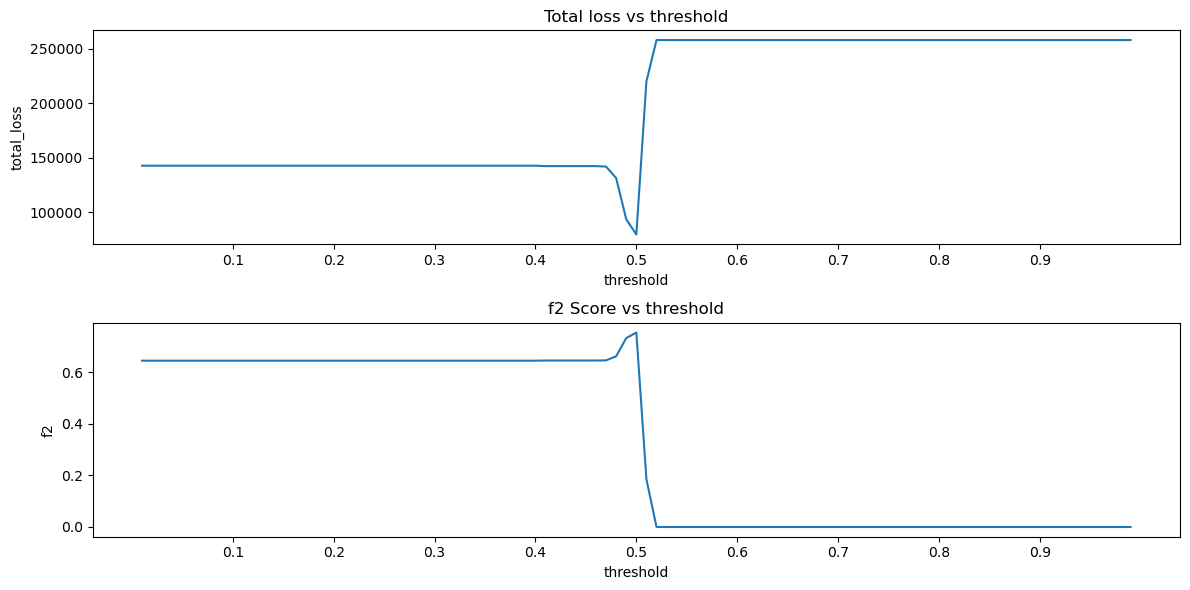

In [299]:
plt.figure(figsize= (12,6))
plt.subplot(2,1,1)
sns.lineplot(data= df_threshold, x= 'threshold', y= 'total_loss')
plt.title('Total loss vs threshold')
plt.xticks(np.arange(0.1, 1, 0.1))

plt.subplot(2,1,2)
sns.lineplot(data= df_threshold, x= 'threshold', y= 'f2')
plt.title('f2 Score vs threshold')
plt.xticks(np.arange(0.1, 1, 0.1))

plt.tight_layout()
;

Grafik diatas memperlihatkan bahwa total loss dengan threshold 0.5 adalah batas threshold dengan nilai total loss yang paling kecil. Apabila dilihat dari f2 score, dapat dilihat bahwa score tertinggi adalah dengan menggunakan threshold di 0.5. Sehingga dari kedua grafik tersebut dapat diartikan bahwa threshold yang terbaik adalah dengan menggunakan 0.5.

In [258]:
best_thresh = df_threshold.sort_values(by= ['total_loss', 'threshold'], ascending= [True, True]).iloc[0,0]
best_thresh

0.5

Nilai 0.5 berarti bahwa apabila probabilitas customer akan churn berada di atas 0.5, maka akan dikategorikan sebagai kelas 1 atau churn. Sedangkan apabila probabilitas customer akan churn berada di bawah 0.5, maka akan dikategorikan seabgai kelas 0 atau tidak churn.

In [259]:
# fit
best_model.fit(X_train, y_train)

# predict
y_pred_proba = best_model.predict_proba(X_test)[:, 1]       
y_pred_thresh = np.where(y_pred_proba > best_thresh, 1, 0) 
    
# recall score
fbeta_score(y_test, y_pred_thresh, beta= 2)

0.7529493407356003

**9.2 Confussion Matrix**

In [260]:
# untuk mendapatkan kondisi sebelum machine learning
pipe_model = adaboost

pipe_model_adaboost = Pipeline([
        ('preprocessing', transformer),
        ('modeling', pipe_model)
    ])

pipe_model_adaboost.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model_adaboost.predict_proba(X_test)[:, 1]       
y_pred_before_ml = np.where(y_pred_proba > 0.1, 1, 0) 

''

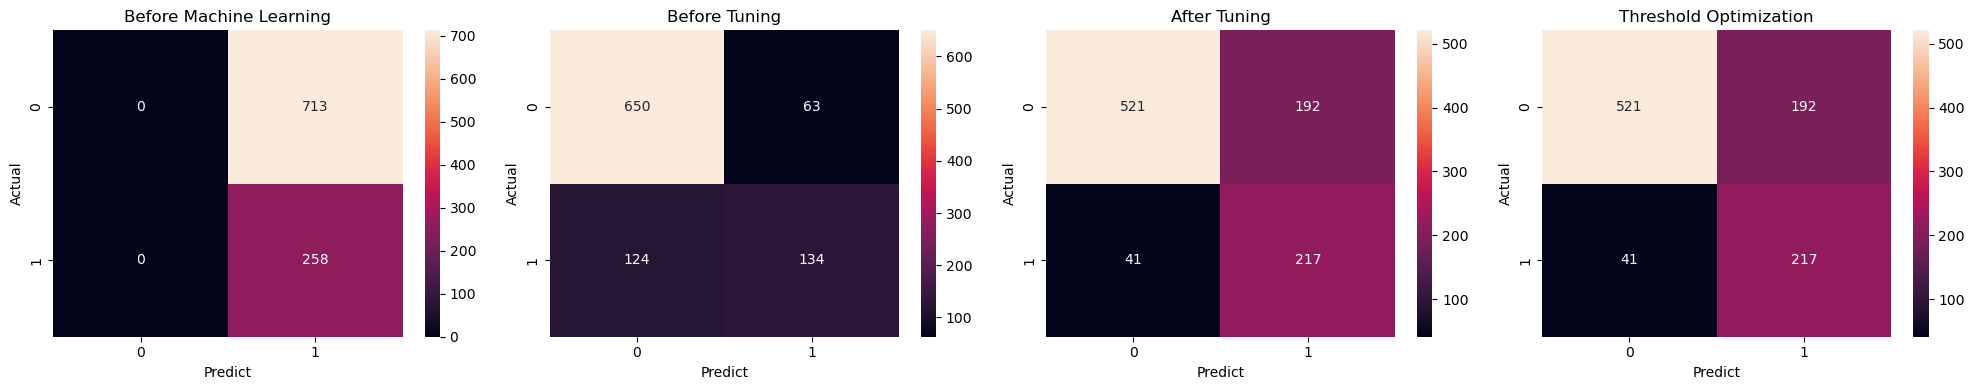

In [261]:
plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
sns.heatmap(data= confusion_matrix(y_test, y_pred_before_ml), annot= True, fmt= 'g')
plt.title('Before Machine Learning')
plt.ylabel('Actual')
plt.xlabel('Predict')

plt.subplot(1,4,2)
sns.heatmap(data= confusion_matrix(y_test, y_pred_untuned), annot= True, fmt= 'g')
plt.title('Before Tuning')
plt.ylabel('Actual')
plt.xlabel('Predict')

plt.subplot(1,4,3)
sns.heatmap(data= confusion_matrix(y_test, y_pred_tuned), annot= True, fmt= 'g')
plt.title('After Tuning')
plt.ylabel('Actual')
plt.xlabel('Predict')

plt.subplot(1,4,4)
sns.heatmap(data= confusion_matrix(y_test, y_pred_thresh), annot= True, fmt= 'g')
plt.title('Threshold Optimization')
plt.ylabel('Actual')
plt.xlabel('Predict')

plt.tight_layout()
;

In [262]:
df_before_tuning = confusion_matrix(y_test, y_pred_untuned)
df_after_tuning = confusion_matrix(y_test, y_pred_tuned)
df_optim_tresh = confusion_matrix(y_test, y_pred_thresh)
df_before_ml = confusion_matrix(y_test, y_pred_before_ml)

FP_cost = 200
FN_cost = 1000

In [263]:
print(f'''Total loss before machine learning:         {(df_before_ml[0][1] * FP_cost) + (df_before_ml[1][0] * FN_cost)}
Total loss before tuning:                   {(df_before_tuning[0][1] * FP_cost) + (df_before_tuning[1][0] * FN_cost)}
Total loss after tuning:                    {(df_after_tuning[0][1] * FP_cost) + (df_after_tuning[1][0] * FN_cost)}
Total loss after threshold optimization:    {(df_optim_tresh[0][1] * FP_cost) + (df_optim_tresh[1][0] * FN_cost)}''')

Total loss before machine learning:         142600
Total loss before tuning:                   136600
Total loss after tuning:                    79400
Total loss after threshold optimization:    79400


Sebelum adanya machine learning, perusahaan menganggap semua customer akan churn sehingga diprediksi bahwa semua customer akan churn. Sehingga banyak terjadi error atau kesalahan dalam memprediksi customer, dimana akan menyebabkan total loss yang tinggi yaitu 142.600 dollar.

Ketika menggunakan machine learning pada kondisi sebelum tuning, total loss yang harus dikeluarkan oleh perusahaan adalah sebesar 136.600 dollar, sedangkan setelah di tuning cost yang harus dikeluarkan oleh perusahaan adalah sebesar 79.400 dollar. Berdasarkan nilai accuracy maupun total cost yang harus dikeluarkan, dapat diperoleh bahwa model sebaiknya menggunakan model yang sudah di tuning.

Berdasarkan hasil perhitungan kerugian, dapat dilihat bahwa hasil yang didapatkan oleh model setelah tuning maupun optimize threshold sama. Sehingga dapat diartikan bahwa tidak diperlukan optimize threshold.

In [264]:
print('Before Tuning')
print(classification_report(y_test, y_pred_untuned))

print('After Tuning')
print(classification_report(y_test, y_pred_tuned))

Before Tuning
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       713
           1       0.68      0.52      0.59       258

    accuracy                           0.81       971
   macro avg       0.76      0.72      0.73       971
weighted avg       0.80      0.81      0.80       971

After Tuning
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       713
           1       0.53      0.84      0.65       258

    accuracy                           0.76       971
   macro avg       0.73      0.79      0.73       971
weighted avg       0.82      0.76      0.77       971



## **10. Feature Importance**

In [265]:
cols_onehot = best_model[1].transformers_[0][1].get_feature_names_out()
cols_onehot

array(['Dependents_No', 'Dependents_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'], dtype=object)

In [266]:
cols_contract = best_model[1].transformers_[1][1].get_feature_names_out()
cols_contract

array(['Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'], dtype=object)

In [267]:
cols_ord_robust = best_model[1].transformers_[2][2]
cols_ord_robust

['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

In [268]:
cols_minmax = best_model[1].transformers_[3][2]
cols_minmax

['tenure', 'MonthlyCharges']

In [269]:
list_all_cols = list(cols_onehot) + list(cols_contract) + list(cols_ord_robust) + list(cols_minmax)
list_all_cols

['Dependents_No',
 'Dependents_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'tenure',
 'MonthlyCharges']

In [270]:
best_model[2]

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=0)

In [271]:
df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = list_all_cols
df_feature_importance['importance'] = best_model[2].feature_importances_

,features,importance
15,MonthlyCharges,0.52
14,tenure,0.25
11,OnlineBackup,0.04
13,TechSupport,0.04
4,InternetService_DSL,0.03
10,OnlineSecurity,0.03
3,PaperlessBilling_Yes,0.02
7,Contract_Month-to-month,0.02
8,Contract_One year,0.02
0,Dependents_No,0.01


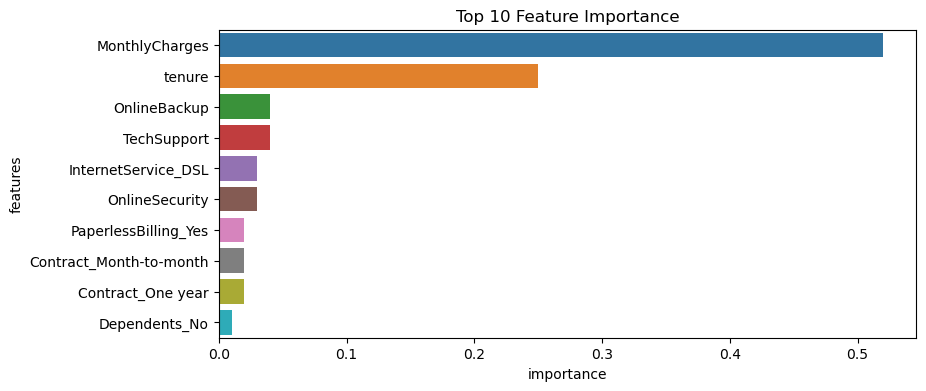

In [272]:
plt.figure(figsize= (9,4))
sns.barplot(
    data= df_feature_importance.sort_values(by='importance', ascending= False).head(10),
    x= 'importance',
    y= 'features'
    )

plt.title('Top 10 Feature Importance')
;

df_feature_importance.sort_values(by='importance', ascending= False).head(10)

Berdasarkan hasil feature importance, dapat diperoleh bahwa feature 'monthlycharges' mempunyai pengaruh yang terbesar dalam menentukan apakah seorang akan churn atau tidak. Selanjutnya feature 'tenure' akan menjadi feature dengan pengaruh terbesar kedua. Kemudian apabila seorang menggunakan internet service berupa fiber optic, maka kemungkinan untuk seorang churn akan lebih tinggi.

---
# **Results**

## **Conclusion & Reccomendation**

**a. Conclusion**

Berdasarkan hasil machine learning, dapat diperoleh bahwa machine learning mempunyai dampak yang baik bagi perusahaan dimana setelah dilakukannya machine learning kerugian yang dimiliki oleh perusahaan dapat di minimalkan. Sebelumnya, perusahaan akan memprediksi seluruh customer sebagai customer yang akan churn. Walaupun terdapat beberapa orang yang diprediksi secara benar, namun hasil kerugian dari prediksi yang salah juga akan mempunyai nilai yang besar. 

Berdasarkan hasil EDA, dapat diperoleh juga bahwa customer yang tidak mempunyai dependent akan lebih cenderung untuk churn. Untuk customer yang tidak mempunyai online security juga mempunuyai kecenderungan untuk churn. Hal yang sama juga terjadi pada kolom online backup, device protection, dan tech support. Sedangkan untuk customer yang menggunakan internet service berupa fiber optic mempunyai kecenderungan yang lebih tinggi untuk churn ketimbang customer dengan internet service lainnya. Dapat dilihat juga bahwa customer yang cenderung mempunyai monthly charges yang tinggi akan cenderung untuk churn. Sedangkan untuk tenure, dapat dilihat bahwa customer cenderung untuk churn apabila mempunyai nilai tenure yang rendah, atau customer tersebut dapat dikatakan sebagai customer baru.

Berdasarkan hasil cross validasi, opsi algoritma terbaik adalah dengan menggunakan algoritma adaboost dan decision tree, dimana nilai rata-rata tertinggi diperoleh oleh adaboost dan nilai standar deviasi paling rendah didapatkan oleh decision tree. Sehingga dapat dikatakan bahwa model yang mepunyai score tertinggi adalah adaboost, namun model yang paling stabil adalah decision tree. 

In [275]:
gridsearch_adaboost2.best_estimator_

Pipeline(steps=[('resampling', RandomOverSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'InternetService']),
                                                 ('contract',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Contract']),
                                                 ('ord_robust',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(mapping=[{'c...
Yes                    2
dtype: int64},
                                                                                           {'col': 'TechSupport',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64}])),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('robust', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('modeling',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=100,
                                    random_state=0))])

Setelah didapatkan bahwa adaboost dan decision tree merupakan alogritma model dengan nilai dan kestabilan yang terbaik, maka akan dilakukan hyperparameter tuning. Berdasarkan hasilnya dapat diperoleh bahwa model terbaik adalah dengan menggunakan adaboost, dimana score dari model tersebut lebih tinggi dari model dengan algoritma decision tree (baik decision tree setelah di tuning ataupun sebelum). Parameter-parameter yang terbaik dari model adaboost adalah:

- Resampling dengan RandomOverSampler().
- Kolom dependents, paperless billing, internet service, dan contract sebaiknya di lakukan encoding dengan onehot.
- Kolom online security, online backup, device protection, dan tech support sebaiknya dilakukan encoding dengan ordinal encoder dengan menggunakan mapping `ordinal_map1` yang kemudian akan di scaling dengan menggunakan robust scaler.
- Kolom tenure dan monthly charges sebaiknya dilakukan scaling dengan menggunakan min max scaler.
- Model yang sebaiknya digunakan adalah menggunakan `AdaBoostClassifier(learning_rate= 0.5, n_estimators= 100, random_state= 0)`.

Tuning dari model juga mempengaruhi nilai accuracy dari model, sehingga dapat diperoleh bahwa model terbaik adalah model yang sudah di tuning. Sebelum adanya tuning, model hanya dapat memperoleh ilai accuracy sebesar 54%. Sedangkan setelah adanya tuning terjadi peningkatan sebesar 20%, dimana nilai accuracy model sekarang menjadi 74%.

In [288]:
print(f'''Total loss before machine learning:         {(df_before_ml[0][1] * FP_cost) + (df_before_ml[1][0] * FN_cost)}
Total loss after machine learning:          {(df_after_tuning[0][1] * FP_cost) + (df_after_tuning[1][0] * FN_cost)}''')

Total loss before machine learning:         142600
Total loss after machine learning:          79400


In [289]:
loss_after_ml = ((df_before_ml[0][1] * FP_cost) + (df_before_ml[1][0] * FN_cost)) - ((df_after_tuning[0][1] * FP_cost) + (df_after_tuning[1][0] * FN_cost))
loss_after_ml

63200

In [290]:
loss_before_ml = (df_before_ml[0][1] * FP_cost) + (df_before_ml[1][0] * FN_cost)
loss_after_ml * 100 // loss_before_ml

44

Apabila dilihat dari sisi biaya kerugian yang mungkin terjadi, dapat diperoleh bahwa biaya yang harus dikeluarkan perusahaan sebelum adanya machine learning sebesar 142.600 dollar. Sedangkan setelah diberlakukannya machine learning, dapat dilihat bahwa terjadi pengurangan dari biaya yang harus dikeluarkan sebesar 63.200 dollar. Sehingga dapat diartikan bahwa keberadaan dari machine learning dapat mengurangi biaya kerugian yang disebabkan akibat kesalahan prediksi sebanyak 44%. Perhitungan dilakukan dengan anggapan bahwa biaya yang dikeluarkan untuk FN adalah 5x biaya FP, sehingga apabila biaya FP adalah 200 dollar maka biaya FN adalah 1000 dollar.

Feature importance juga memperlihatkan bahwa tenure mempunyai pengaruh terbesar dalam menentukan apakah seorang customer akan churn atau tidak.

**b. Reccomendation**

**b.1 Business Recommendation**

Text(0.5, 1.0, 'MonthlyCharges')

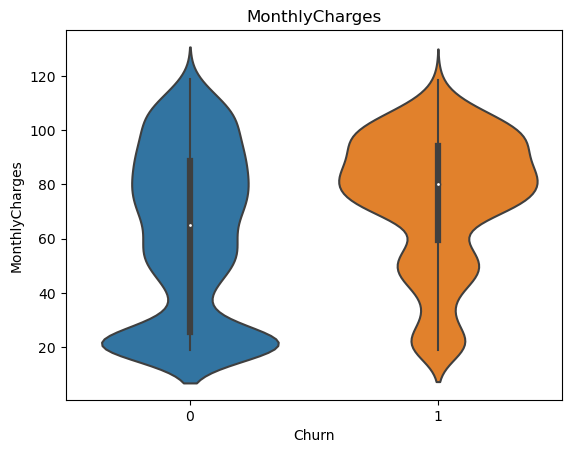

In [301]:
sns.violinplot(data= df, x= 'Churn', y= df['MonthlyCharges'])
plt.title('MonthlyCharges')

Berdasarkan hasil analisa, dapat dilihat bahwa feature yang sangat mempengaruhi seorang customer untuk churn adalah monthly charges atau biaya bulanan untuk langganan. Apabila dilihat secara grafik, dapat dilihat bahwa customer yang cenderung untuk churn adalah customer yang mempunyai biaya langganan yang cukup tinggi. Sehingga salah satu opsi yang dapat dilakukan untuk mengurangi terjadinya kemungkinan seorang customer akan churn adalah dengan menentukan biaya monthly charges dengan harga yang rendah.

Salah satunya adalah mungkin dengan memberikan potongan-potongan harga tertentu seperti discount, atau mungkin paket-paket bundling, ataupun yang lainnya.

Text(0.5, 1.0, 'tenure')

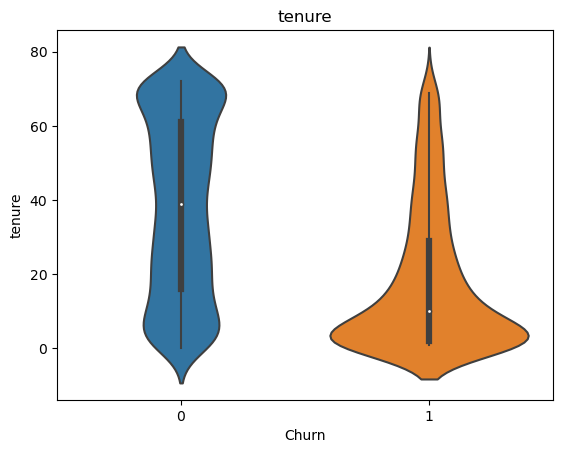

In [303]:
sns.violinplot(data= df, x= 'Churn', y= df['tenure'])
plt.title('tenure')

Hasil analisa juga menunjukkan bahwa kolom tenure mempunyai pengaruh yang cukup besar kedua adalah kolom tenure atau lamanya seorang customer menjadi customer dari perusahaan ini. Secara grafik, customer dengan nilai tenure yang rendah cenderung untuk churn, sedangkan customer dengan nilai tenure yang tinggi mempunyai kecenderungan untuk stay. Berdasarkan hal ini, dapat dikatakan bahwa customer baru atau customer dengan nilai tenure yang rendah cenderung untuk melakukan churn. Sehingga opsi yang dapat dilakukan untuk mencegah terjadinya churn adalah dengan membuat customer tersebut nyaman dengan perusahaan ini.

Salah satu caranya adalah dengan memberlakukan treatment-treatment spesial seperti biaya langganan yang lebih murah apabil sudah lama berlangganan, membuat sistem membership dengan level dimana seseorang bisa mendapatkan keuntungan-keuntungan tertentu ketika berada di suatu level, ataupun treatment khusus lainnya.

**b.2 Model Reccomendation**

Pada model kali ini, proses pencarian dari model terbaik tidak dapat dilakukan. Proses pencarian tidak dapat dilakukan secara terbaik karena adanya limitasi dari hardware yang digunakan. Sehingga opsi yang terbaik untuk dilakukan adalah dengan melakukan running di cloud. Proses pencarian sebaiknya dilakukan dengan menggunakan grid search dari awal, sehingga tidak memerlkukan untuk proses pencarian sebanyak 2 kali atau lebih. Opsi lainnya adalah apabila menggunakan random search, maka sebaiknya n_iter atau jumlah banyaknya model yang akan dicari sebaiknya diperluas.

Kolom waktu kapan customer tersebut mulai menggunakan layanan perusahaan. Kolom ini dapat memperlihatkan apakah seorang customer mulai menggunakan layanan perusahaan berdsarkan adanya promo pada bulan tersebut atau tidak, sehingga dapat dilihat pada quarter ke berapa seorang customer tidak churn. Adanya feature tersebut, juga dapat memberikan insight kapankah perusahaan sebaiknya mengeluarkan ajakan untuk menjadi customer perusahaan.

Kolom dependents sebaiknya tidak digunakan. Berdasarkan hasil model, dapat dilihat bahwa dependents tidak mempunyai pengaruh yang signifikan terhadap penentuan apakah seorang customer akan churn atau tidak. Dapat dilihat customer yang tidak mempunyai dependents mempunyai pengaruh sebesar 1% saja untuk menentukan apakah customer tersebut akan churn atau tidak.

## **Export Model**

In [273]:
import pickle

In [305]:
best_model

Pipeline(steps=[('resampling', RandomOverSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'PaperlessBilling',
                                                   'InternetService']),
                                                 ('contract',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Contract']),
                                                 ('ord_robust',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(mapping=[{'c...
Yes                    2
dtype: int64},
                                                                                           {'col': 'TechSupport',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': No internet service    0
No                     1
Yes                    2
dtype: int64}])),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('robust', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('modeling',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=100,
                                    random_state=0))])

In [306]:
best_model.fit(X,y)

pickle.dump(best_model, open('adaboost_best_model.sav', 'wb'))